# CNN Model

# Import All Necessary Libraries and Create File Paths

In [1]:
import os
import sys
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Modelling CNN|
import tensorflow as tf
import glob
import math
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
# folder path or file path constants that will be used in this project
# Root Directory (between 'F:' or 'D:'' depends on the external drive)
ROOT = "D:"

# Folder inside D:\\wildfire-sumatera-dataset
WILDFIRE_SUMATERA_DATASET_FOLDER_PATH = f"{ROOT}\\wildfire-sumatera-dataset"


# Folders and metadatas inside D:\\wildfire-sumatera-dataset
WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH        = f"{WILDFIRE_SUMATERA_DATASET_FOLDER_PATH}\\wildfire-sumatera-geotiff"
WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH           = f"{WILDFIRE_SUMATERA_DATASET_FOLDER_PATH}\\wildfire-sumatera-image"
WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH      = f"{WILDFIRE_SUMATERA_DATASET_FOLDER_PATH}\\wildfire-sumatera-image-mask"

# Files (.csv) and metadatas inside D:\\wildfire-sumatera-dataset
METADATA_LANDSAT_8_FILE_PATH  = f"{WILDFIRE_SUMATERA_DATASET_FOLDER_PATH}\\metadata_landsat_8.csv"
METADATA_SENTINEL_2_FILE_PATH = f"{WILDFIRE_SUMATERA_DATASET_FOLDER_PATH}\\metadata_sentinel_2.csv"

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff
SENTINEL_2_GEOTIFF_FOLDER_PATH = f"{WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH}\\sentinel-2"
LANDSAT_8_GEOTIFF_FOLDER_PATH  = f"{WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH}\\landsat-8"

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-image
SENTINEL_2_IMAGE_FOLDER_PATH = f"{WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH}\\sentinel-2"
LANDSAT_8_IMAGE_FOLDER_PATH  = f"{WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH}\\landsat-8"

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8
LANDSAT_8_PREFIRE_GEOTIFF_FOLDER_PATH  = f"{LANDSAT_8_GEOTIFF_FOLDER_PATH}\\prefire"
LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH = f"{LANDSAT_8_GEOTIFF_FOLDER_PATH}\\postfire"

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\sentinel-2
SENTINEL_2_PREFIRE_GEOTIFF_FOLDER_PATH  = f"{SENTINEL_2_GEOTIFF_FOLDER_PATH}\\prefire"
SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH = f"{SENTINEL_2_GEOTIFF_FOLDER_PATH}\\postfire"

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-image-mask
SENTINEL_2_IMAGE_MASK_FOLDER_PATH = f"{WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH}\\sentinel-2"
LANDSAT_8_IMAGE_MASK_FOLDER_PATH  = f"{WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH}\\landsat-8"

dirs = [
    WILDFIRE_SUMATERA_DATASET_FOLDER_PATH,
    WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 
    WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH,
    WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH,
    
    SENTINEL_2_GEOTIFF_FOLDER_PATH, 
    LANDSAT_8_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_IMAGE_FOLDER_PATH,
    LANDSAT_8_IMAGE_FOLDER_PATH,
    
    LANDSAT_8_PREFIRE_GEOTIFF_FOLDER_PATH,
    LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_PREFIRE_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH,
    
    SENTINEL_2_IMAGE_MASK_FOLDER_PATH,
    LANDSAT_8_IMAGE_MASK_FOLDER_PATH,
]

for dir_ in dirs:
    if not os.path.exists(dir_):
        os.mkdir(dir_)
        print(f"{dir_} has been created")
    else:
        print(f"{dir_} already exist")

D:\wildfire-sumatera-dataset already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image\sentinel-2 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image\landsat-8 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\prefire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\prefire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2 already exist


# Constants

In [3]:
RANDOM_STATE = 42
BATCH_SIZE = 32
SEED = RANDOM_STATE
WIDTH = 160
HEIGHT = 160
CHANNEL = 3
INPUT_SHAPE = (HEIGHT, WIDTH, CHANNEL)
TEST_SIZE = 0.2

# Prepare Data

# Create Machine Learning Model

In [4]:
landsat_df = pd.read_csv(os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'metadata_landsat_8_new.csv'))
filtered_landsat_df = landsat_df[(landsat_df['image_condition']==1) & landsat_df['class_by_median']==1]
# filtered_landsat_df = landsat_df[(landsat_df['image_condition']==1)]

In [5]:
# load paths
image_paths = []
mask_paths = []
for index, row in tqdm(filtered_landsat_df.iterrows()):
    image_paths.append(os.path.join(ROOT, row['folder_paths_image_mask'], 'image.png'))
    mask_paths.append(os.path.join(ROOT, row['folder_paths_image_mask'], 'cleaned_mask.png'))

x_train, x_val_test, y_train, y_val_test = train_test_split(
    image_paths,
    mask_paths,
    shuffle=True,
    train_size=0.8,
    random_state=RANDOM_STATE
)

x_val, x_test, y_val, y_test = train_test_split(
    x_val_test,
    y_val_test,
    shuffle=True,
    train_size=0.5,
    random_state=RANDOM_STATE
)

# put all of the images paths and their masks path into tf data format
tf_train_image_mask_paths = tf.data.Dataset.from_tensor_slices((x_train, y_train))
tf_val_image_mask_paths = tf.data.Dataset.from_tensor_slices((x_val, y_val))
tf_test_image_mask_paths = tf.data.Dataset.from_tensor_slices((x_test, y_test))

print("\033[1m"+"train paths"+"\033[0m")
for path in tf_train_image_mask_paths.take(5):
    print('image path = ', path[0].numpy().decode('utf_8'))
    print('mask path = ', path[1].numpy().decode('utf_8'))
    
print("\033[1m"+"validation paths"+"\033[0m")
for path in tf_val_image_mask_paths.take(5):
    print('image path = ', path[0].numpy().decode('utf_8'))
    print('mask path = ', path[1].numpy().decode('utf_8'))

print("\033[1m"+"test paths""\033[0m")
for path in tf_test_image_mask_paths.take(5):
    print('image path = ', path[0].numpy().decode('utf_8'))
    print('mask path = ', path[1].numpy().decode('utf_8'))

974it [00:00, 15459.74it/s]


train paths
image path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6531\image.png
mask path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6531\cleaned_mask.png
image path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4840\image.png
mask path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\4840\cleaned_mask.png
image path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6426\image.png
mask path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6426\cleaned_mask.png
image path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3353\image.png
mask path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3353\cleaned_mask.png
image path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3348\image.png
mask path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\3348\clean

In [6]:
def normalize_image(image, mask):    
    image = tf.cast(image, tf.float32)/ 255.0
    mask = mask / 255
    return image, tf.cast(mask, tf.uint8)

def resize_image_mask(image, mask):
    image = tf.image.resize(image, (WIDTH, HEIGHT), method='nearest')
    mask = tf.image.resize(mask, (WIDTH, HEIGHT), method='nearest')
    return image, mask

def augment_image_mask(image, mask):
    if tf.random.uniform(()) > 0.5:
        # Random flipping of the image and mask
        image = tf.image.flip_left_right(image)
        mask = tf.image.flip_left_right(mask)
        
    if tf.random.uniform(()) > 0.5:
        # Random flipping of the image and mask
        image = tf.image.flip_up_down(image)
        mask = tf.image.flip_up_down(mask)
    
    if tf.random.uniform(()) > 0.5:
        # Random flipping of the image and mask
        image = tf.image.rot90(image)
        mask = tf.image.rot90(mask)
        
    return image, mask

def load_image_mask(image_path, mask_path):
    # read the image file
    image = tf.io.read_file(image_path)
    # decode the image which is in .png format
    image = tf.io.decode_png(image)
    
    # read the mask file
    mask = tf.io.read_file(mask_path)
    # decode the mask which is in .png format
    mask = tf.io.decode_png(mask)
    return image, mask

In [32]:
# def prepare_train_dataset(paths):
#     # get all images and masks
#     dataset = paths.map(load_image_mask, num_parallel_calls=tf.data.experimental.AUTOTUNE)
#     # normalize only images
#     dataset = dataset.map(normalize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
#     # data augmentation process for images and masks
#     augmentation_layers = tf.keras.Sequential([
#         tf.keras.layers.Resizing(height=HEIGHT, width=WIDTH),
#         tf.keras.layers.RandomRotation(factor=0.5, seed=SEED),
# #         tf.keras.layers.RandomFlip(seed=SEED),
#         tf.keras.layers.RandomZoom(
#             height_factor=(-0.2, -0.2), #zoomed height in between 5% to 20%
#             width_factor=(-0.2, -0.2),
#             seed=SEED), #zoomed width in between 5% to 20%
#         tf.keras.layers.RandomTranslation(
#             height_factor=(-0.2, 0.2), #shifted down by 20% and up by 20%
#             width_factor=(-0.2, 0.2), 
#             seed=SEED), #shifted left by 20% and right by 20%
#     ])
#     dataset = dataset.map(lambda image, mask: (augmentation_layers(image), augmentation_layers(mask)) ,
#                           num_parallel_calls=tf.data.experimental.AUTOTUNE)

#     dataset = dataset.batch(BATCH_SIZE)
#     dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
#     return dataset

def prepare_test_dataset(paths):
    # get all images and masks
    dataset = paths.map(load_image_mask, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    # normalize only images
    dataset = dataset.map(normalize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    # data augmentation process for images and masks
    augmentation_layers = tf.keras.Sequential([
        tf.keras.layers.Resizing(height=HEIGHT, width=WIDTH),
    ])
    dataset = dataset.map(lambda image, mask: (augmentation_layers(image), augmentation_layers(mask)) ,
                          num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

In [8]:
def prepare_train_dataset(paths):
    # get all images and masks
    dataset = paths.map(load_image_mask, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    # resize images and masks
    dataset = dataset.map(resize_image_mask, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    # normalize only images
    dataset = dataset.map(normalize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    # data augmentation process for images and masks
    dataset = dataset.map(augment_image_mask,
                          num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
    
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

In [9]:
# get all images and masks
train_dataset = prepare_train_dataset(tf_train_image_mask_paths)
val_dataset = prepare_test_dataset(tf_val_image_mask_paths)
test_dataset = prepare_test_dataset(tf_test_image_mask_paths) 

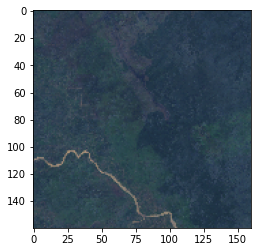

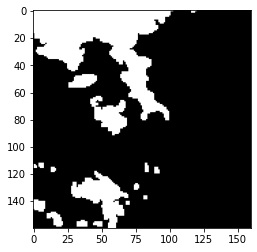

In [10]:
for d in train_dataset.take(1):
    image = d[0][0].numpy()
    mask = d[1][0].numpy()
    plt.imshow(image*3)
    plt.show()
    plt.imshow(mask, cmap='gray')
    plt.show()

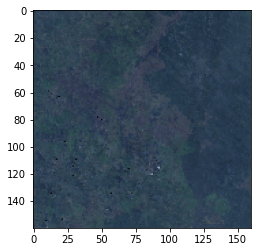

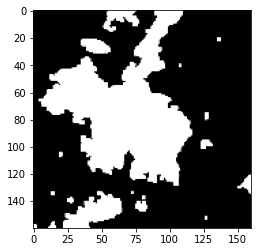

In [59]:
for d in val_dataset.take(1):
    image = d[0][0].numpy()
    mask = d[1][0].numpy()
    plt.imshow(image*3)
    plt.show()
    plt.imshow(mask, cmap='gray')
    plt.show()

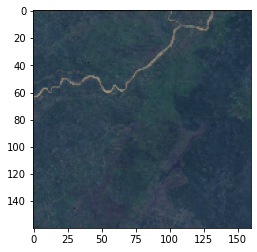

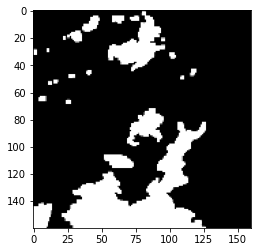

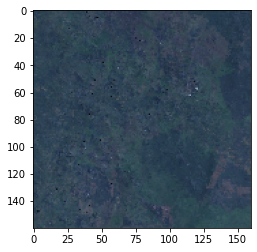

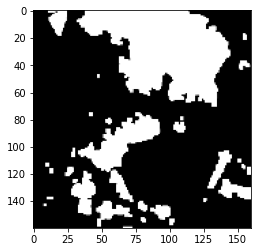

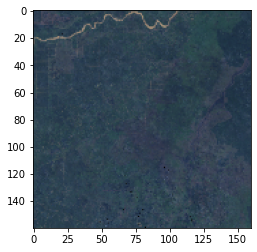

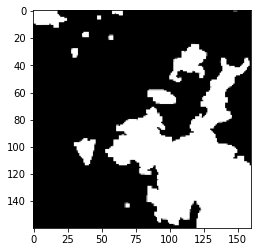

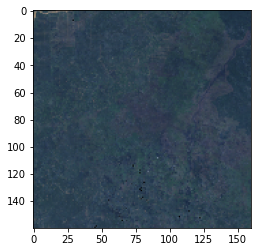

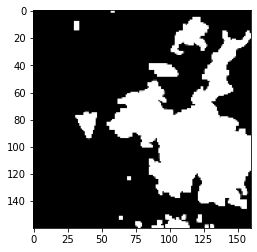

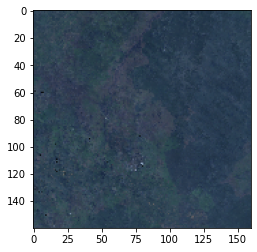

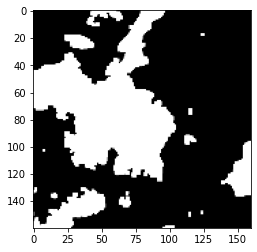

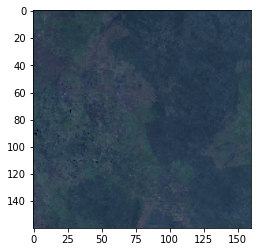

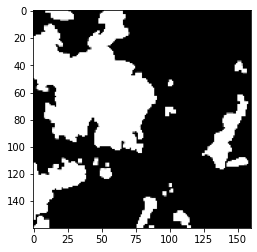

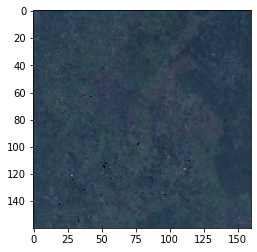

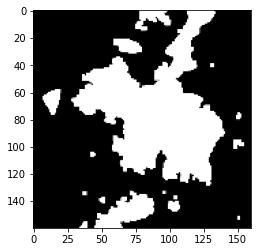

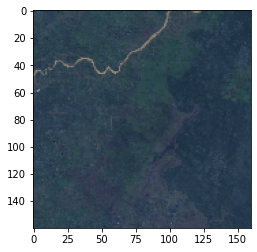

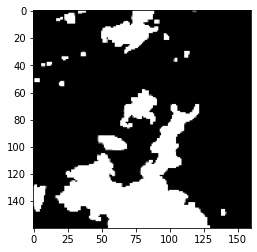

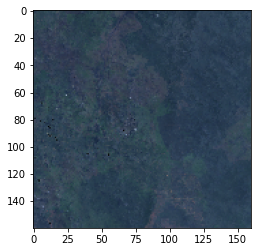

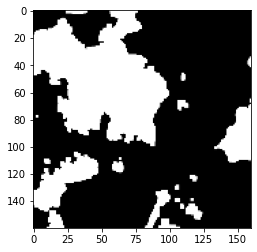

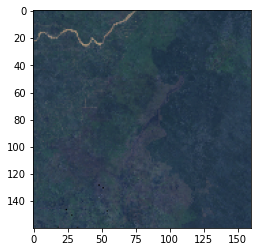

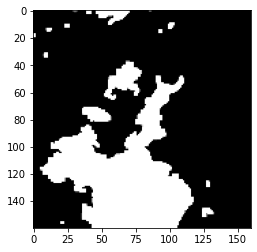

In [63]:
for d in test_dataset.take(1):
    for i in range(10):
        image = d[0][i].numpy()
        mask = d[1][i].numpy()
        plt.imshow(image*3)
        plt.show()
        plt.imshow(mask, cmap='gray')
        plt.show()

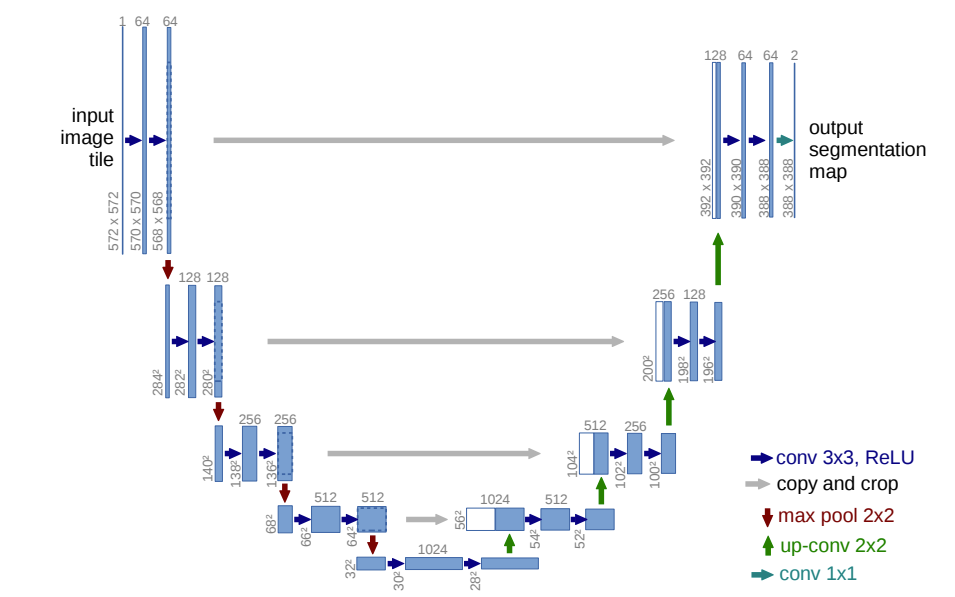

In [12]:
def double_conv_block(x, n_filters):
    x = tf.keras.layers.Conv2D(filters=n_filters,
                               kernel_size=(3, 3),
                               activation=tf.nn.relu,
                               padding='same',
                               kernel_initializer='he_normal',
                              )(x)
    x = tf.keras.layers.Conv2D(filters=n_filters,
                               kernel_size=(3, 3),
                               activation=tf.nn.relu,
                               padding='same',
                               kernel_initializer='he_normal',
                              )(x)
    return x
    
def downsample_conv_block(x, n_filters):
    c = double_conv_block(x, n_filters)
    p = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(c)
#     p = tf.keras.layers.Dropout(0.3)(p)
    return c, p


def upsample_conv_block(x, conv_features, n_filters):
    x = tf.keras.layers.Conv2DTranspose(filters=n_filters,
                                        kernel_size=(3, 3),
                                        strides=(2, 2),
                                        padding='same',)(x)
    x = tf.keras.layers.concatenate([x, conv_features])
#     x = tf.keras.layers.Dropout(0.3)(x)
    x = double_conv_block(x, n_filters)
    return x

    
def get_model(input_shape, starting_filter, factor=2):
    # input to the model     
    inputs = tf.keras.layers.Input(shape=input_shape)
    
    # encoder: contracting path - downsample
    # downsample conv block - 1
    c1, p1 = downsample_conv_block(inputs, n_filters=int(starting_filter*math.pow(factor,0)))
    # downsample conv block - 2
    c2, p2 = downsample_conv_block(p1, n_filters=int(starting_filter*math.pow(factor,1)))
    # downsample conv block - 3
    c3, p3 = downsample_conv_block(p2, n_filters=int(starting_filter*math.pow(factor,2)))
    # downsample conv block - 4
    c4, p4 = downsample_conv_block(p3, n_filters=int(starting_filter*math.pow(factor,3)))
    
    # downsample conv block - 5 (Bottleneck)
    bottleneck = double_conv_block(p4, n_filters=int(starting_filter*math.pow(factor,4)))
    
    # decoder: expanding path - upsample
    # upsample conv block - 1
    u1 = upsample_conv_block(bottleneck, c4, n_filters=int(starting_filter*math.pow(factor,3)))
    # upsample conv block - 2
    u2 = upsample_conv_block(u1, c3, n_filters=int(starting_filter*math.pow(factor,2)))
    # upsample conv block - 3
    u3 = upsample_conv_block(u2, c2, n_filters=int(starting_filter*math.pow(factor,1)))
    # upsample conv block - 4
    u4 = upsample_conv_block(u3, c1, n_filters=int(starting_filter*math.pow(factor,0)))
    
    # output
    outputs = tf.keras.layers.Conv2D(filters=1,
                                     kernel_size=(1, 1),
                                     activation='sigmoid')(u4)
    
    unet_model = tf.keras.Model(inputs, outputs, name='unet-model')
    return unet_model

In [79]:
# Create Model
unet_model = get_model(
    input_shape=INPUT_SHAPE,
    starting_filter=16,
)
display(unet_model.summary())

Model: "unet-model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_57 (Conv2D)             (None, 160, 160, 16  448         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_58 (Conv2D)             (None, 160, 160, 16  2320        ['conv2d_57[0][0]']              
                                )                                                        

                                                                                                  
Total params: 2,158,705
Trainable params: 2,158,705
Non-trainable params: 0
__________________________________________________________________________________________________


None

# Limiting GPU memory growth

In [80]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)
        
tf.debugging.set_log_device_placement(True)

1 Physical GPUs, 1 Logical GPU


# Compile and Train U-Net Model

In [81]:
# Compile Model
unet_model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

index = len(glob.glob('./best_unet_model*')) + 1

epochs=50
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 2),
    tf.keras.callbacks.ModelCheckpoint(
        filepath = './best_unet_model_{}'.format(index), 
        monitor = 'val_accuracy'.format(index), 
        save_best_only = True,
        mode = 'max', 
        verbose = 2,
    )
]

history = unet_model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/50
25/25 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5571
Epoch 1: val_accuracy improved from -inf to 0.69746, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 13s 432ms/step - loss: 0.6857 - accuracy: 0.5571 - val_loss: 0.6580 - val_accuracy: 0.6975
Epoch 2/50
25/25 [==============================] - ETA: 0s - loss: 0.6320 - accuracy: 0.7060
Epoch 2: val_accuracy improved from 0.69746 to 0.70041, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 9s 382ms/step - loss: 0.6320 - accuracy: 0.7060 - val_loss: 0.6087 - val_accuracy: 0.7004
Epoch 3/50
25/25 [==============================] - ETA: 0s - loss: 0.5842 - accuracy: 0.7085
Epoch 3: val_accuracy improved from 0.70041 to 0.70261, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 11s 457ms/step - loss: 0.5842 - accuracy: 0.7085 - val_loss: 0.5647 - val_accuracy: 0.7026
Epoch 4/50
25/25 [==============================] - ETA: 0s - loss: 0.5544 - accuracy: 0.7097
Epoch 4: val_accuracy improved from 0.70261 to 0.70321, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 10s 389ms/step - loss: 0.5544 - accuracy: 0.7097 - val_loss: 0.5371 - val_accuracy: 0.7032
Epoch 5/50
25/25 [==============================] - ETA: 0s - loss: 0.5226 - accuracy: 0.7100
Epoch 5: val_accuracy improved from 0.70321 to 0.70325, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 9s 358ms/step - loss: 0.5226 - accuracy: 0.7100 - val_loss: 0.5034 - val_accuracy: 0.7032
Epoch 6/50
25/25 [==============================] - ETA: 0s - loss: 0.4923 - accuracy: 0.7101
Epoch 6: val_accuracy improved from 0.70325 to 0.70391, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 10s 396ms/step - loss: 0.4923 - accuracy: 0.7101 - val_loss: 0.5091 - val_accuracy: 0.7039
Epoch 7/50
25/25 [==============================] - ETA: 0s - loss: 0.4778 - accuracy: 0.7157
Epoch 7: val_accuracy improved from 0.70391 to 0.72157, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 13s 521ms/step - loss: 0.4778 - accuracy: 0.7157 - val_loss: 0.4709 - val_accuracy: 0.7216
Epoch 8/50
25/25 [==============================] - ETA: 0s - loss: 0.5006 - accuracy: 0.7257
Epoch 8: val_accuracy did not improve from 0.72157
25/25 [==============================] - 5s 198ms/step - loss: 0.5006 - accuracy: 0.7257 - val_loss: 0.4711 - val_accuracy: 0.7211
Epoch 9/50
25/25 [==============================] - ETA: 0s - loss: 0.4664 - accuracy: 0.7499
Epoch 9: val_accuracy improved from 0.72157 to 0.78899, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 8s 333ms/step - loss: 0.4664 - accuracy: 0.7499 - val_loss: 0.4510 - val_accuracy: 0.7890
Epoch 10/50
25/25 [==============================] - ETA: 0s - loss: 0.4451 - accuracy: 0.7995
Epoch 10: val_accuracy improved from 0.78899 to 0.82946, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 12s 476ms/step - loss: 0.4451 - accuracy: 0.7995 - val_loss: 0.4489 - val_accuracy: 0.8295
Epoch 11/50
25/25 [==============================] - ETA: 0s - loss: 0.4300 - accuracy: 0.8260
Epoch 11: val_accuracy improved from 0.82946 to 0.83578, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 12s 484ms/step - loss: 0.4300 - accuracy: 0.8260 - val_loss: 0.4374 - val_accuracy: 0.8358
Epoch 12/50
25/25 [==============================] - ETA: 0s - loss: 0.4163 - accuracy: 0.8385
Epoch 12: val_accuracy improved from 0.83578 to 0.83600, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 11s 432ms/step - loss: 0.4163 - accuracy: 0.8385 - val_loss: 0.4201 - val_accuracy: 0.8360
Epoch 13/50
25/25 [==============================] - ETA: 0s - loss: 0.3924 - accuracy: 0.8445
Epoch 13: val_accuracy improved from 0.83600 to 0.85002, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 9s 356ms/step - loss: 0.3924 - accuracy: 0.8445 - val_loss: 0.3573 - val_accuracy: 0.8500
Epoch 14/50
25/25 [==============================] - ETA: 0s - loss: 0.3674 - accuracy: 0.8425
Epoch 14: val_accuracy improved from 0.85002 to 0.85071, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 10s 396ms/step - loss: 0.3674 - accuracy: 0.8425 - val_loss: 0.3391 - val_accuracy: 0.8507
Epoch 15/50
25/25 [==============================] - ETA: 0s - loss: 0.3429 - accuracy: 0.8530
Epoch 15: val_accuracy improved from 0.85071 to 0.85978, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 10s 405ms/step - loss: 0.3429 - accuracy: 0.8530 - val_loss: 0.3207 - val_accuracy: 0.8598
Epoch 16/50
25/25 [==============================] - ETA: 0s - loss: 0.3286 - accuracy: 0.8598
Epoch 16: val_accuracy improved from 0.85978 to 0.86362, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 10s 391ms/step - loss: 0.3286 - accuracy: 0.8598 - val_loss: 0.3124 - val_accuracy: 0.8636
Epoch 17/50
25/25 [==============================] - ETA: 0s - loss: 0.3202 - accuracy: 0.8636
Epoch 17: val_accuracy improved from 0.86362 to 0.86684, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 9s 344ms/step - loss: 0.3202 - accuracy: 0.8636 - val_loss: 0.3043 - val_accuracy: 0.8668
Epoch 18/50
25/25 [==============================] - ETA: 0s - loss: 0.3098 - accuracy: 0.8685
Epoch 18: val_accuracy improved from 0.86684 to 0.87194, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 8s 324ms/step - loss: 0.3098 - accuracy: 0.8685 - val_loss: 0.2941 - val_accuracy: 0.8719
Epoch 19/50
25/25 [==============================] - ETA: 0s - loss: 0.2984 - accuracy: 0.8737
Epoch 19: val_accuracy improved from 0.87194 to 0.87899, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 8s 335ms/step - loss: 0.2984 - accuracy: 0.8737 - val_loss: 0.2808 - val_accuracy: 0.8790
Epoch 20/50
25/25 [==============================] - ETA: 0s - loss: 0.2884 - accuracy: 0.8783
Epoch 20: val_accuracy improved from 0.87899 to 0.88336, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 8s 315ms/step - loss: 0.2884 - accuracy: 0.8783 - val_loss: 0.2698 - val_accuracy: 0.8834
Epoch 21/50
25/25 [==============================] - ETA: 0s - loss: 0.2745 - accuracy: 0.8849
Epoch 21: val_accuracy improved from 0.88336 to 0.88892, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 8s 323ms/step - loss: 0.2745 - accuracy: 0.8849 - val_loss: 0.2580 - val_accuracy: 0.8889
Epoch 22/50
25/25 [==============================] - ETA: 0s - loss: 0.2623 - accuracy: 0.8906
Epoch 22: val_accuracy improved from 0.88892 to 0.89168, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 8s 335ms/step - loss: 0.2623 - accuracy: 0.8906 - val_loss: 0.2517 - val_accuracy: 0.8917
Epoch 23/50
25/25 [==============================] - ETA: 0s - loss: 0.2518 - accuracy: 0.8955
Epoch 23: val_accuracy improved from 0.89168 to 0.89524, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 8s 328ms/step - loss: 0.2518 - accuracy: 0.8955 - val_loss: 0.2411 - val_accuracy: 0.8952
Epoch 24/50
25/25 [==============================] - ETA: 0s - loss: 0.2359 - accuracy: 0.9023
Epoch 24: val_accuracy improved from 0.89524 to 0.90032, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 8s 316ms/step - loss: 0.2359 - accuracy: 0.9023 - val_loss: 0.2299 - val_accuracy: 0.9003
Epoch 25/50
25/25 [==============================] - ETA: 0s - loss: 0.2282 - accuracy: 0.9057
Epoch 25: val_accuracy improved from 0.90032 to 0.90051, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 8s 331ms/step - loss: 0.2282 - accuracy: 0.9057 - val_loss: 0.2291 - val_accuracy: 0.9005
Epoch 26/50
25/25 [==============================] - ETA: 0s - loss: 0.2228 - accuracy: 0.9081
Epoch 26: val_accuracy improved from 0.90051 to 0.90289, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 11s 429ms/step - loss: 0.2228 - accuracy: 0.9081 - val_loss: 0.2229 - val_accuracy: 0.9029
Epoch 27/50
25/25 [==============================] - ETA: 0s - loss: 0.2176 - accuracy: 0.9103
Epoch 27: val_accuracy improved from 0.90289 to 0.90651, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 11s 452ms/step - loss: 0.2176 - accuracy: 0.9103 - val_loss: 0.2130 - val_accuracy: 0.9065
Epoch 28/50
25/25 [==============================] - ETA: 0s - loss: 0.2130 - accuracy: 0.9122
Epoch 28: val_accuracy improved from 0.90651 to 0.90769, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 10s 406ms/step - loss: 0.2130 - accuracy: 0.9122 - val_loss: 0.2076 - val_accuracy: 0.9077
Epoch 29/50
25/25 [==============================] - ETA: 0s - loss: 0.2086 - accuracy: 0.9140
Epoch 29: val_accuracy improved from 0.90769 to 0.90911, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 8s 316ms/step - loss: 0.2086 - accuracy: 0.9140 - val_loss: 0.2043 - val_accuracy: 0.9091
Epoch 30/50
25/25 [==============================] - ETA: 0s - loss: 0.2006 - accuracy: 0.9173
Epoch 30: val_accuracy improved from 0.90911 to 0.91252, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 12s 497ms/step - loss: 0.2006 - accuracy: 0.9173 - val_loss: 0.1970 - val_accuracy: 0.9125
Epoch 31/50
25/25 [==============================] - ETA: 0s - loss: 0.1942 - accuracy: 0.9199
Epoch 31: val_accuracy improved from 0.91252 to 0.91534, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 8s 322ms/step - loss: 0.1942 - accuracy: 0.9199 - val_loss: 0.1905 - val_accuracy: 0.9153
Epoch 32/50
25/25 [==============================] - ETA: 0s - loss: 0.1874 - accuracy: 0.9226
Epoch 32: val_accuracy improved from 0.91534 to 0.91704, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 10s 403ms/step - loss: 0.1874 - accuracy: 0.9226 - val_loss: 0.1864 - val_accuracy: 0.9170
Epoch 33/50
25/25 [==============================] - ETA: 0s - loss: 0.1815 - accuracy: 0.9250
Epoch 33: val_accuracy improved from 0.91704 to 0.91922, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 8s 330ms/step - loss: 0.1815 - accuracy: 0.9250 - val_loss: 0.1809 - val_accuracy: 0.9192
Epoch 34/50
25/25 [==============================] - ETA: 0s - loss: 0.1782 - accuracy: 0.9264
Epoch 34: val_accuracy improved from 0.91922 to 0.92051, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 9s 354ms/step - loss: 0.1782 - accuracy: 0.9264 - val_loss: 0.1781 - val_accuracy: 0.9205
Epoch 35/50
25/25 [==============================] - ETA: 0s - loss: 0.1738 - accuracy: 0.9282
Epoch 35: val_accuracy improved from 0.92051 to 0.92201, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 11s 445ms/step - loss: 0.1738 - accuracy: 0.9282 - val_loss: 0.1743 - val_accuracy: 0.9220
Epoch 36/50
25/25 [==============================] - ETA: 0s - loss: 0.1713 - accuracy: 0.9292
Epoch 36: val_accuracy improved from 0.92201 to 0.92343, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 8s 322ms/step - loss: 0.1713 - accuracy: 0.9292 - val_loss: 0.1714 - val_accuracy: 0.9234
Epoch 37/50
25/25 [==============================] - ETA: 0s - loss: 0.1691 - accuracy: 0.9302
Epoch 37: val_accuracy did not improve from 0.92343
25/25 [==============================] - 5s 180ms/step - loss: 0.1691 - accuracy: 0.9302 - val_loss: 0.1731 - val_accuracy: 0.9226
Epoch 38/50
25/25 [==============================] - ETA: 0s - loss: 0.1654 - accuracy: 0.9317
Epoch 38: val_accuracy improved from 0.92343 to 0.92373, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 11s 455ms/step - loss: 0.1654 - accuracy: 0.9317 - val_loss: 0.1703 - val_accuracy: 0.9237
Epoch 39/50
25/25 [==============================] - ETA: 0s - loss: 0.1611 - accuracy: 0.9335
Epoch 39: val_accuracy improved from 0.92373 to 0.92653, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 13s 528ms/step - loss: 0.1611 - accuracy: 0.9335 - val_loss: 0.1645 - val_accuracy: 0.9265
Epoch 40/50
25/25 [==============================] - ETA: 0s - loss: 0.1575 - accuracy: 0.9351
Epoch 40: val_accuracy improved from 0.92653 to 0.92810, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 10s 388ms/step - loss: 0.1575 - accuracy: 0.9351 - val_loss: 0.1612 - val_accuracy: 0.9281
Epoch 41/50
25/25 [==============================] - ETA: 0s - loss: 0.1554 - accuracy: 0.9360
Epoch 41: val_accuracy improved from 0.92810 to 0.92881, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 9s 349ms/step - loss: 0.1554 - accuracy: 0.9360 - val_loss: 0.1596 - val_accuracy: 0.9288
Epoch 42/50
25/25 [==============================] - ETA: 0s - loss: 0.1531 - accuracy: 0.9370
Epoch 42: val_accuracy improved from 0.92881 to 0.92970, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 8s 331ms/step - loss: 0.1531 - accuracy: 0.9370 - val_loss: 0.1579 - val_accuracy: 0.9297
Epoch 43/50
25/25 [==============================] - ETA: 0s - loss: 0.1507 - accuracy: 0.9380
Epoch 43: val_accuracy improved from 0.92970 to 0.93069, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 9s 367ms/step - loss: 0.1507 - accuracy: 0.9380 - val_loss: 0.1559 - val_accuracy: 0.9307
Epoch 44/50
25/25 [==============================] - ETA: 0s - loss: 0.1483 - accuracy: 0.9391
Epoch 44: val_accuracy improved from 0.93069 to 0.93148, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 8s 329ms/step - loss: 0.1483 - accuracy: 0.9391 - val_loss: 0.1541 - val_accuracy: 0.9315
Epoch 45/50
25/25 [==============================] - ETA: 0s - loss: 0.1459 - accuracy: 0.9400
Epoch 45: val_accuracy improved from 0.93148 to 0.93230, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 9s 366ms/step - loss: 0.1459 - accuracy: 0.9400 - val_loss: 0.1524 - val_accuracy: 0.9323
Epoch 46/50
25/25 [==============================] - ETA: 0s - loss: 0.1441 - accuracy: 0.9408
Epoch 46: val_accuracy improved from 0.93230 to 0.93293, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 8s 335ms/step - loss: 0.1441 - accuracy: 0.9408 - val_loss: 0.1511 - val_accuracy: 0.9329
Epoch 47/50
25/25 [==============================] - ETA: 0s - loss: 0.1420 - accuracy: 0.9417
Epoch 47: val_accuracy improved from 0.93293 to 0.93297, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 9s 350ms/step - loss: 0.1420 - accuracy: 0.9417 - val_loss: 0.1511 - val_accuracy: 0.9330
Epoch 48/50
25/25 [==============================] - ETA: 0s - loss: 0.1404 - accuracy: 0.9424
Epoch 48: val_accuracy improved from 0.93297 to 0.93425, saving model to .\best_unet_model_3


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


INFO:tensorflow:Assets written to: .\best_unet_model_3\assets


25/25 [==============================] - 10s 410ms/step - loss: 0.1404 - accuracy: 0.9424 - val_loss: 0.1484 - val_accuracy: 0.9343
Epoch 49/50
25/25 [==============================] - ETA: 0s - loss: 0.1466 - accuracy: 0.9400
Epoch 49: val_accuracy did not improve from 0.93425
25/25 [==============================] - 6s 243ms/step - loss: 0.1466 - accuracy: 0.9400 - val_loss: 0.1545 - val_accuracy: 0.9314
Epoch 50/50
25/25 [==============================] - ETA: 0s - loss: 0.1427 - accuracy: 0.9416
Epoch 50: val_accuracy did not improve from 0.93425
25/25 [==============================] - 5s 210ms/step - loss: 0.1427 - accuracy: 0.9416 - val_loss: 0.1491 - val_accuracy: 0.9337


In [82]:
def evaluate_model(history):
    plt.figure(figsize=(10, 15))
    plt.subplot(211)
    plt.title('Accuracy vs Validation Accuracy')
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 15))
    plt.subplot(212)
    plt.title('Loss vs Validation Loss')
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.legend()
    plt.show()

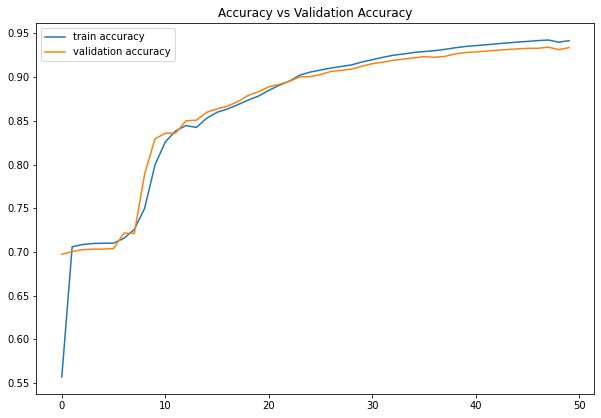

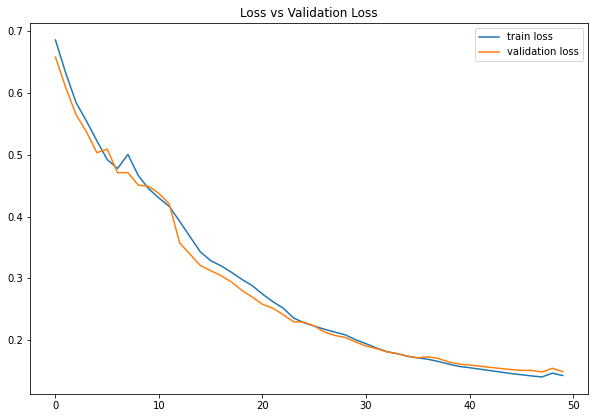

In [83]:
evaluate_model(history)

In [88]:
result = unet_model.predict(test_dataset)

4/4 [==============================] - 1s 125ms/step


In [89]:
np_result = np.array(result)
# for i, res in enumerate(np_result):
np_result = np.where(np_result<0.5, 0, 1)

In [90]:
def display_image_prediction(dataset, result_mask):
    for batch in dataset.take(1):
        fig, axs = plt.subplots(10, 3, figsize=(10, 40), sharey=True)
        for i in range(10):
            image = batch[0][i].numpy()
            true_mask = batch[1][i].numpy()
            predicted_mask = result_mask[i]
            axs[i, 0].imshow(image*3)
            axs[i, 0].set_title('Image')
            axs[i, 1].imshow(true_mask)
            axs[i, 1].set_title('True Mask')
            axs[i, 2].imshow(predicted_mask)
            axs[i, 2].set_title('Predicted Mask')
        plt.show()

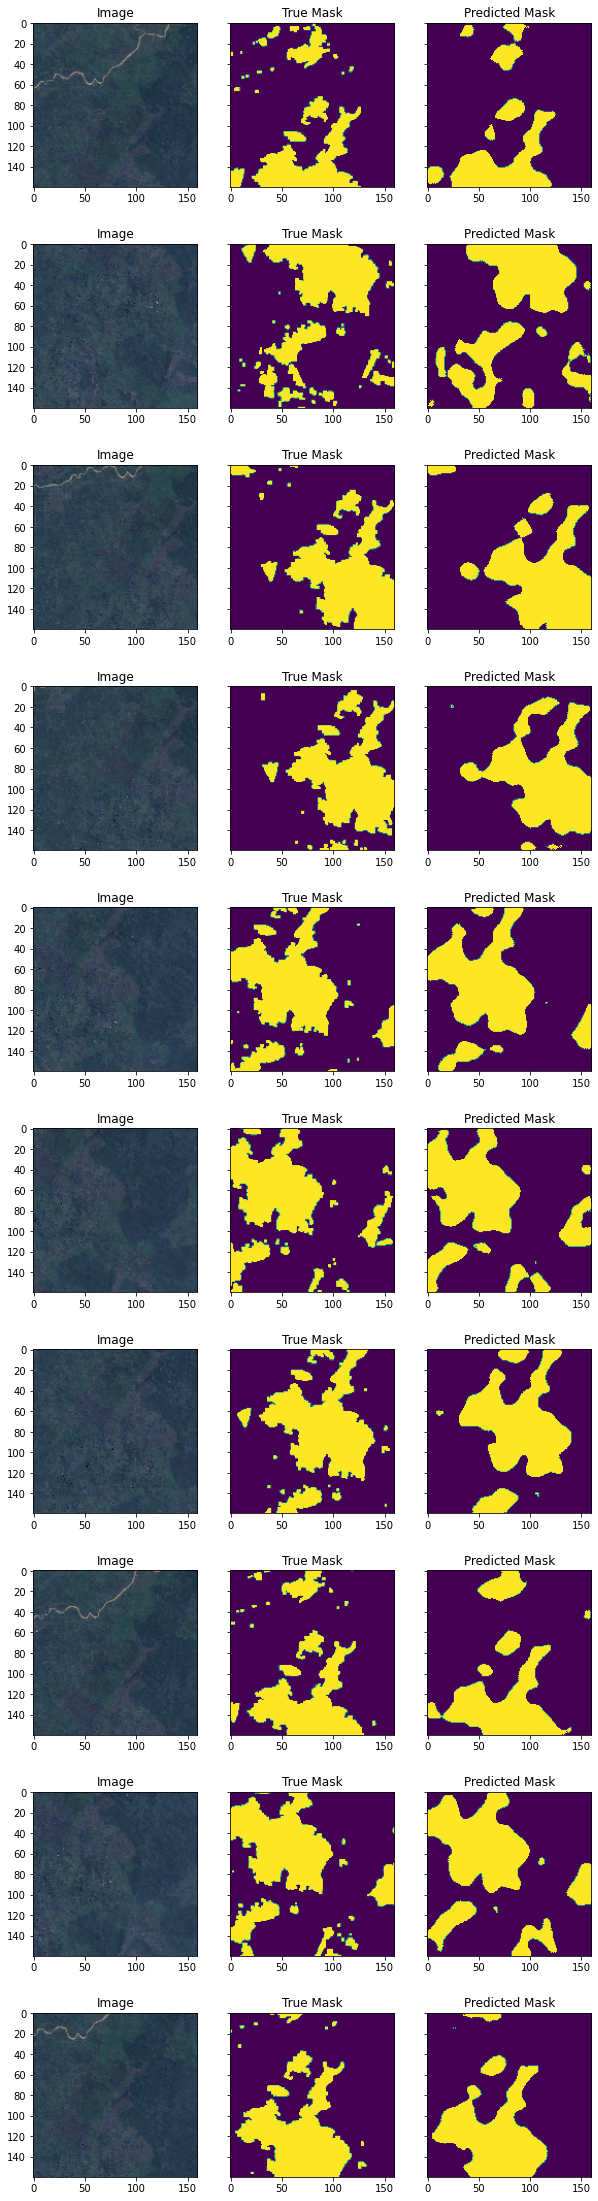

In [91]:
display_image_prediction(test_dataset, np_result)